# Activity: Exploring the Titanic Dataset

## Introduction

- **Objective:**

In this activity, we aim to dive deeper into the Titanic dataset, a well-known dataset in the field of data science. We will explore and analyze the dataset using various techniques to gain insights into the passengers' information and survival rates. This exploration will help us practice essential data analysis skills and understand how to approach real-world datasets.

- **About the Titanic Dataset:**

The Titanic dataset contains information about passengers who were aboard the RMS Titanic during its ill-fated maiden voyage in 1912. It is a classic dataset used in data science and machine learning for various tasks, including predictive modeling.

- **Key Features in the Titanic Dataset:**

| Feature                          | Description                                                 |
|----------------------------------|-------------------------------------------------------------|
| Passenger Class (Pclass)         | Represents the class of the passenger ticket (1st, 2nd, or 3rd class). |
| Name                             | The name of the passenger.                                  |
| Sex                              | The gender of the passenger (male or female).              |
| Age                              | The age of the passenger.                                   |
| Siblings/Spouses Aboard (SibSp)  | The number of siblings or spouses the passenger had on board. |
| Parents/Children Aboard (Parch)  | The number of parents or children the passenger had on board. |
| Ticket                           | The ticket number.                                          |
| Fare                             | The fare paid by the passenger.                             |
| Cabin                            | The cabin number where the passenger stayed.                |
| Embarked                         | The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). |
| Survived                         | A binary variable indicating whether the passenger survived (1) or not (0). |


- **Data Analysis Goals:**
    - We will explore the distribution of variables like age, fare, and passenger class to understand the demographics of the passengers.
    - We'll investigate relationships between variables, such as the influence of passenger class or gender on survival rates.
    - We'll also identify any missing data and potential outliers in the dataset.
    - Lastly, we'll perform exploratory data analysis to gain insights that can guide further analysis and modeling efforts.

## 1. Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [4]:
# Load the Titanic dataset from the data folder
titanic_data = pd.read_csv('../data/titanic.csv')

## 3. Exploratory Data Analysis (EDA)

### 1. Examine the First Few Rows

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- displey only two first rows

In [5]:
# displey only two first rows
titanic_data.head(n = 2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 2. Check the Dataset Shape

**Objective:** Determine the dimensions of the Titanic dataset.

- Check the shape of the dataset (rows, columns)

In [7]:
# Check the shape of the dataset (rows, columns)
print("Dataset shape:", titanic_data.shape)

Dataset shape: (891, 12)


- The dataset has 891 rows and 12 columns.
- The shape of the dataset tells us that it contains 891 records or observations, and each record has 12 different attributes or features. This gives us an understanding of the dataset's size and structure.

### 3. Check the Dataset Information

**Objective:** Obtain information about the Titanic dataset.

- Display data types and non-null values

In [8]:
# Display data types and non-null values
print("\nData info:")
print(titanic_data.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- The info() function provides information about the dataset, including the total number of non-null entries in each column, the data types of each column, and memory usage. It also indicates whether there are any missing values in the dataset.

- by using the info() function, we can see the data types of each column. For example, we can see that some columns are of type int64, indicating integer values, while others are of type object, indicating text or categorical data. Additionally, the info() function tells us whether there are any missing values in each column. Columns with missing values are indicated by non-null counts less than the total number of rows.

- Based on this data info, we can make several immediate observations:
   - There are 891 rows in the dataset, indicating that we have data for 891 passengers.
    - Some columns, such as "Age" and "Cabin," have missing values since their non-null counts are less than 891.
     - We have a mix of data types, including integers, floating-point numbers, and objects (likely strings).
     - We have a diverse set of columns, including information about passenger demographics, ticket details, and survival status.

### 4. Generat the Dataset Summary

**Objective:** Create a summary of key statistics and information about the Titanic dataset.

#### Part 1: Summary of Numeric Variables

- Calculate summary statistics for numerical variables

In [11]:
# Calculate summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
titanic_data.describe()


Summary statistics for numerical variables:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Part 2: Summary of Categorical Variables

##### Categorical Variables - Manual Calculation

- For `Sex` column

In [14]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

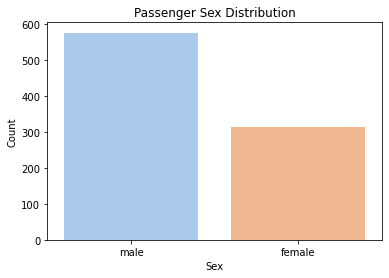

In [36]:
# Create a bar plot for passenger Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Sex', palette = 'pastel')
plt.title('Passenger Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

- For `Embarked` column

In [15]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

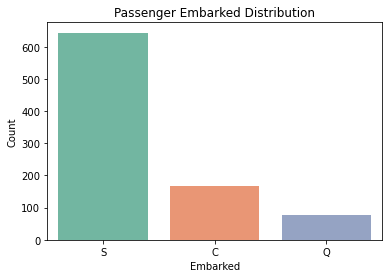

In [43]:
# Create a bar plot for passenger Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Embarked', palette = 'Set2')
plt.title('Passenger Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

- Additional statistics for categorical columns:
    - For `Sex`:
         - Count of unique values: 2
         - Mode: `male` (with a frequency of 577)
         - Frequency of `female`: 314
    - For `Embarked`:
        - Count of unique values: 3
        - Mode: `S` (with a frequency of 644)
        - Frequency of `C`: 168
        - Frequency of `Q`: 77


- Insights from the statistics of categorical variables:
    - Most passengers are `male` (577 out of 891) and embarked from Southampton (`S` with a frequency of 644).
    - There are three unique embarkation points: Southampton, Cherbourg, and Queenstown.

##### Categorical Variables - Using describe() function

- Calculate summary statistics for categorical variables Using `describe()` function

In [16]:
# Calculate summary statistics for categorical variables
print("\nSummary statistics categorical variables:")
titanic_data.describe(include=['object'])


Summary statistics categorical variables:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


For categorical variables, the `describe()` function provides the following summary statistics:
- Count: The total number of non-null entries.
- Unique: The count of unique values.
- Top: The most frequent (mode) category.
- Freq: The frequency (count) of the top category.

The `describe()` statistics help us understand the distribution of categorical variables more efficiently by providing a concise summary. 

We can quickly identify the most common category (mode), its frequency, and the number of unique categories. 

This information is valuable for understanding the prevalence and distribution of different categories within each categorical variable and can be used to make informed decisions during data analysis and modeling.

For instance:

- For `Sex`, there are 891 passengers, with two unique values. `male` is the most frequent value, appearing 577 times.
- For `Embarked`, there are 889 passengers, with three unique values. `S` is the most frequent embarkation point, occurring 644 times.

Both the `describe()` function and **manual calculations** offer valuable insights into categorical variables, providing counts, modes, and frequencies. However, manual calculations reveal specific unique values, a detail that the `describe()` function does not show. This combination of methods enhances our understanding of categorical data.

### 5. Investigate Missing Values

**Objective:** Identify and count missing values in the Titanic dataset.

In [17]:
# identify missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- In the `Age` column, we identified 177 missing values.
- For the `Cabin` column, there are 687 missing values.
- In the `Embarked` column, we found 2 missing values.

In [21]:
# percentage of missing values
titanic_data.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- The `Age` column has approximately 19.87% missing values.
- The `Cabin` column contains around 77.10% missing values.
- The `Embarked` column has a negligible percentage of missing values, approximately 0.22%.

- Investigating missing data is crucial because missing values can impact the quality of our analysis and models. Ignoring them may lead to biased results.

- Handling missing data allows us to make informed decisions about how to impute or manage the missing values, which can influence the accuracy of our analysis.

- Different columns may require different strategies for dealing with missing data, so understanding their extent and patterns is essential.

### 6. Explore Data Distribution - Histogram

**Objective:** Visualize the distribution of selected numerical columns in the Titanic dataset.

Histograms help us understand the distribution of numerical data by displaying the frequency of values within specific intervals (bins). They can provide insights into the central tendency, spread, and potential outliers in the data.

- Distribution of Passenger `Age`

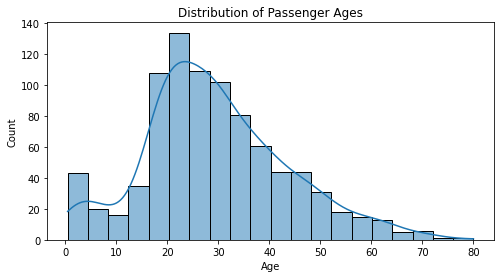

In [7]:
# Create a histogram for passenger ages
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The `Age` histogram shows that the majority of passengers are between their late teens and mid-30s.
- There is a relatively small number of infants and elderly passengers.
- The distribution appears to be somewhat right-skewed, with more passengers in younger age groups.

- Distribution of Passenger `Fare`

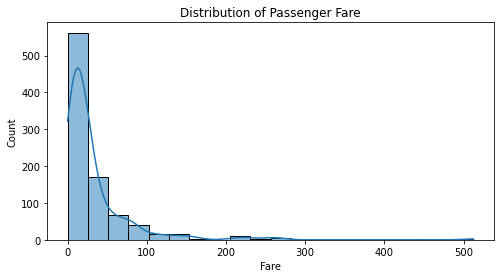

In [25]:
# Create a histogram for passenger ages
plt.figure(figsize=(8, 4))
sns.histplot(data=titanic_data, x='Fare', bins=20, kde=True)
plt.title('Distribution of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

- The `Fare` histogram indicates that a significant portion of passengers paid a relatively low fare.
- There are a few passengers who paid exceptionally high fares, potentially indicating premium cabins or special circumstances.
- The distribution is heavily right-skewed, with the majority of passengers paying lower fares.

**Patterns identified:**
- In the `Age` histogram, we can observe a peak around the late teens to mid-30s, suggesting that the Titanic had a higher number of young and middle-aged passengers.
- For the `Fare` histogram, the right-skewness suggests that while most passengers paid lower fares, there are outliers with significantly higher fares, which might require further investigation.

### 7. Detecting Outliers - Box plot

**Objective:** Create box plots to visualize the distribution of the "Age" and "Fare" columns, understand their statistical components and highlight potential outliers.

- Box plots can visually represent the spread of data and highlight potential outliers.

- For `Age` varibale

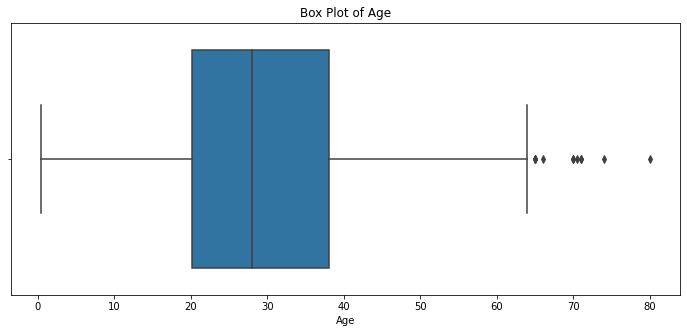

In [49]:
# Create box plots for Age
plt.figure(figsize=(12, 5))
sns.boxplot(data=titanic_data, x='Age')
plt.title('Box Plot of Age')
plt.show()

In [50]:
# Summary statistics of the Age column
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- For `Fare` varibale

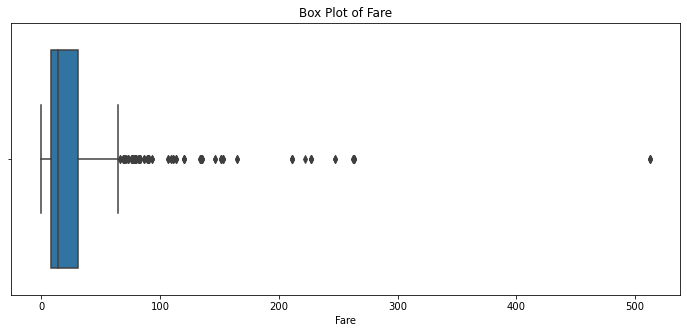

In [51]:
# Create box plots for Fare
plt.figure(figsize=(12, 5))
sns.boxplot( data=titanic_data, x='Fare')
plt.title('Box Plot of Fare')
plt.show()

In [53]:
# Summary statistics of the Fare column
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**The components of a box plot include:**

- **Median (line inside the box)**: The middle value of the dataset, dividing it into two equal halves.
- **Quartiles (box)**: The box represents the interquartile range (IQR), which covers the middle 50% of the data. The lower quartile (Q1) is the 25th percentile, and the upper quartile (Q3) is the 75th percentile.
- **Whiskers (lines extending from the box)**: Typically, whiskers extend to 1.5 times the IQR from the quartiles. Any data points beyond the whiskers are considered potential outliers.
- **Individual data points (dots or circles)**: These are plotted as outliers if they fall outside the whiskers.

The describe function provides statistics such as the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values for a numerical column.

For example, if we use `titanic_data['Age'].describe()`, we obtain statistical insights into the "Age" column, including its mean age, spread (standard deviation), and quartiles.

By examining the box plots, we can identify potential outliers as data points beyond the whiskers of the box plot. 

Outliers are values that significantly differ from the central tendency of the data. For instance, if there are individual data points (dots or circles) far away from the whiskers in the "Fare" box plot, those may be potential outliers.

These interpretations help us understand the distribution and potential outliers within the "Age" and "Fare" columns, which are crucial for data analysis and preprocessing.

### 8. Identifying Outliers using IQR (Advanced and Optional)

**Objective:** Explore an advanced method for detecting outliers using the IQR technique.

**The Interquartile Range (IQR)** is a statistical measure that represents the spread or dispersion of data within a dataset. 

It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). 

The IQR helps identify outliers by defining a range within which the majority of data points lie. Any data point outside this range is considered a potential outlier. 

The IQR is used in outlier detection because it is robust to extreme values and provides a more robust measure of spread compared to the range or standard deviation.

Values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered potential outliers because this range is based on the IQR and represents the "middle 50%" of the data, where the majority of data points are located. 

The 1.5 multiplier is a common threshold used to identify values that significantly deviate from the median of the data. Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers because they fall outside the typical range of variation within the dataset. These potential outliers may indicate data points that are unusual or require further investigation.

- For `Age` column

In [62]:
# Calculate the IQR for Age column
Q1_age = titanic_data['Age'].quantile(0.25)
Q3_age = titanic_data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the lower and upper bounds for potential outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age


print(f"Outliers for Age: Values below {lower_bound_age} and above {upper_bound_age}")

Outliers for Age: Values below -6.6875 and above 64.8125


In [61]:
# Identify potential outliers data for Age
outliers_age = titanic_data[(titanic_data['Age'] < lower_bound_age) | (titanic_data['Age'] > upper_bound_age)]
outliers_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


- For `Fare` column

In [63]:
# Calculate the IQR for Fare column
Q1_fare = titanic_data['Fare'].quantile(0.25)
Q3_fare = titanic_data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define the lower and upper bounds for potential outliers
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"Outliers for Fare: Values below {lower_bound_fare} and above {upper_bound_fare}")

Outliers for Fare: Values below -26.724 and above 65.6344


In [65]:
# Identify potential outliers for Fare
outliers_fare = titanic_data[(titanic_data['Fare'] < lower_bound_fare) | (titanic_data['Fare'] > upper_bound_fare)]
outliers_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


**Implications of Detected Outliers :**

- **Age Outliers:** The outliers in the "Age" column might represent passengers with extreme ages, such as infants or elderly individuals. These outliers could have unique characteristics or needs during emergency situations on the Titanic. Understanding their presence could provide insights into the survival rates and strategies for different age groups.

- **Fare Outliers:** Outliers in the "Fare" column likely indicate passengers who paid significantly higher fares than the majority. These passengers might have had access to more luxurious accommodations or other privileges on the ship. Investigating these outliers could shed light on the socio-economic distribution of passengers and its impact on their survival.

- **Impact on Analysis:** In data analysis and modeling, handling outliers is crucial. Depending on the goals of our analysis, we might choose to treat or remove outliers differently. For example, when predicting survival rates, we might want to investigate how the presence of age or fare outliers affects model accuracy and fairness.

- **Data Integrity:** Identifying outliers is also essential for data integrity. Outliers can sometimes be due to data entry errors or anomalies, and addressing them can improve the overall quality of the dataset.

In summary, understanding the potential implications of outliers helps us make informed decisions during data analysis and modeling and ensures the accuracy and reliability of our insights and predictions.

Using the IQR technique to detect outliers in the "Age" and "Fare" columns provides valuable insights into the distribution and variability of these variables. By identifying potential outliers, we can:

- Understand whether there are extreme values that might influence our analysis.
- Assess the overall spread of data within these columns.
- Make informed decisions about how to handle these outliers, such as whether to remove them or apply specific data preprocessing techniques.
- Gain a deeper understanding of the central tendency and variability of the data, which is essential for accurate analysis and modeling.

### 9. Exploring Correlation

**Objective:** Analyze the relationships between numerical variables in the Titanic dataset.

The purpose of calculating the correlation matrix between numerical variables is to measure the degree and direction of linear relationships between pairs of variables. It helps us understand how changes in one variable relate to changes in another, which can be valuable for feature selection and identifying potential predictors.

The heatmap visualization is a powerful tool to visualize the correlation matrix because it provides a color-coded representation of the correlations. It makes it easier to spot patterns and trends in the data, especially when dealing with a large number of variables. Darker colors indicate stronger correlations, and lighter colors indicate weaker or no correlations.

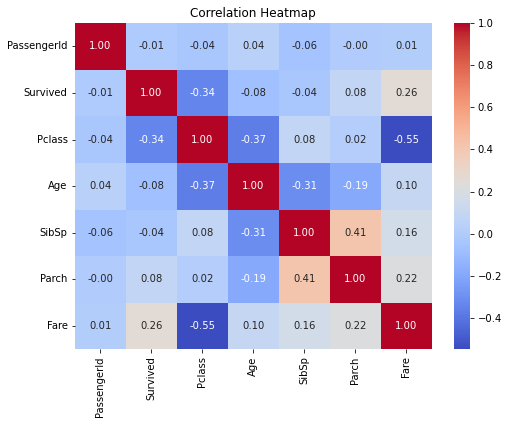

In [69]:
# Create a correlation heatmap
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Based on the heatmap, we can observe several notable correlations between variables:
- There is a moderate negative correlation between `Pclass` (Passenger Class) and `Fare`. As the class number increases (from 1st class to 3rd class), the fare tends to decrease, which is expected.
- `Age` and `Pclass` also show a negative correlation, indicating that older passengers tend to have higher-class tickets.
- `Parch` (Number of Parents/Children Aboard) and `SibSp` (Number of Siblings/Spouses Aboard) exhibit a positive correlation, suggesting that passengers who traveled with more family members tended to have more parents or children.

Additionally, we can see that some variables have weaker correlations, closer to zero, indicating a lack of linear relationships. For example, `Age` and `Fare` have a weak correlation, implying that changes in age do not have a significant linear impact on fares.

- Create a bar plot for passenger classes

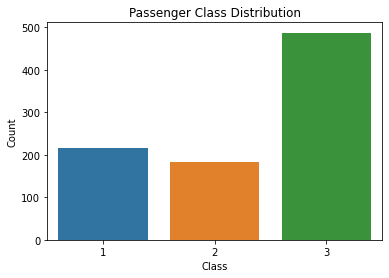

In [11]:
# Create a bar plot for passenger classes
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 10. Summarize Your Findings

**Objective:** Summarize key insights and observations from your Exploratory Data Analysis (EDA).

**1. Discuss the missing value percentages in the dataset. Identify and elaborate on any columns with notable missing data.**

We found that the "Cabin" column has a significant number of missing values, accounting for approximately 77% of the data. This missing data might pose challenges if we plan to use "Cabin" as a feature in our analysis. Additionally, the "Age" column has some missing values, but the percentage is relatively lower at around 19%. We'll need to consider strategies like imputation or removal for these missing values.

**2. Describe any potential outliers that you discovered during your analysis and explain their potential impact on the dataset.**

We detected potential outliers in both the "Age" and "Fare" columns. For "Age," there are outliers on the upper end of the age range, with passengers aged above 65. These outliers might not significantly impact our analysis unless we're focusing on specific age groups. In contrast, the "Fare" column has several high-value outliers, which could affect average fare calculations or models sensitive to outliers.

**3. Highlight significant patterns, relationships, or trends observed in the data.**

During our analysis, we noticed that passengers in the 1st class (Pclass = 1) generally paid higher fares, which aligns with our expectations. We also observed that the majority of passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q). There appears to be a gender imbalance, with more males than females on board.

**4. Provide an overall assessment of data quality and how it might affect future analysis and modeling.**

The data quality is reasonable, but the missing values in the "Cabin" and "Age" columns could impact the precision of our analysis. Outliers in the "Fare" column might skew results in models sensitive to extreme values. Overall, the dataset is promising for further analysis, but we need to address missing data and consider how outliers might affect our modeling outcomes.

This summary helps us understand the dataset's strengths and potential challenges, guiding us in making informed decisions for subsequent data preprocessing and modeling steps.